614.9526074558008
88.21840617793809 33.0


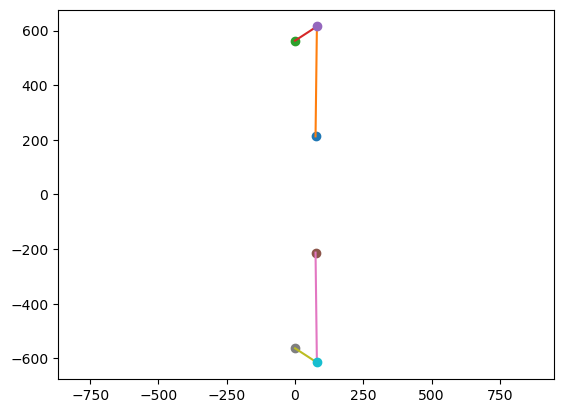

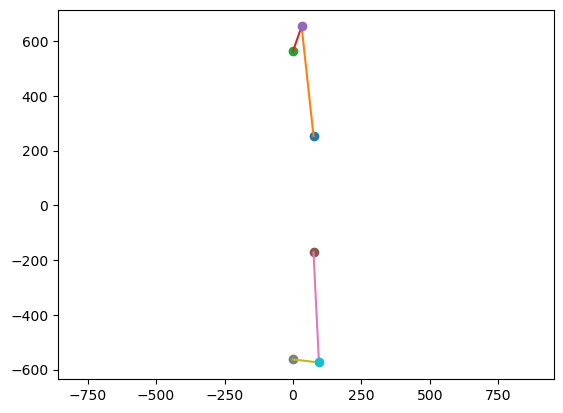

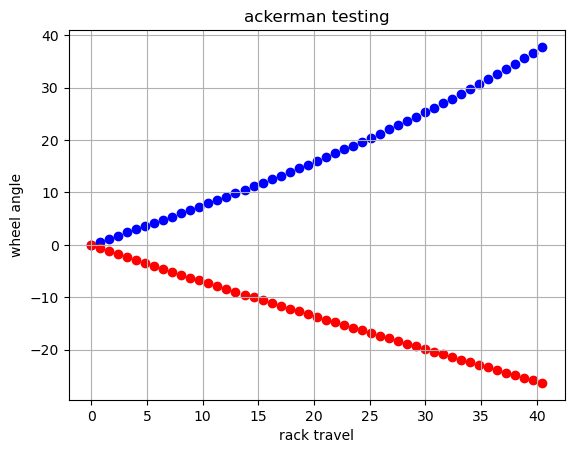

0.6595708471141482


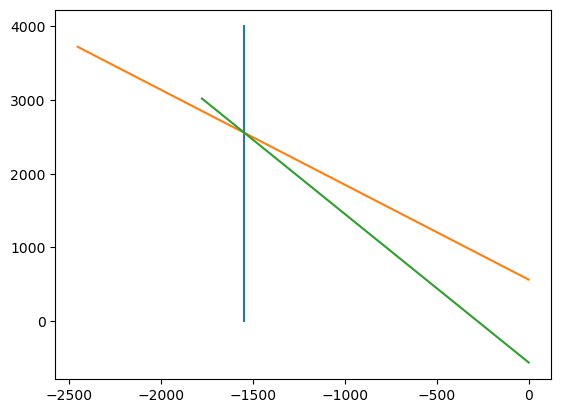

[[-0.6127777680783539, -0.44398089539421315], [0.790255279608375, 0.8960362517917188]]
ackerman angle: 33.0
[-1545.517305501449, 2556.142170005194]
[-1545.517305501449, 2556.142170005194]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

#not commented or organzied, 
#plot 1 is nuetral steer, 
#plot 2 is full steer to the left, 
#plot 3 is the wheel angles, 
#plot 4 isfinding where the tires will intersect

ep= 1e-6
rackx = 75
racky = 425.4
racky2= racky/2
pivoty = (553+573)/2
pivotx = 0
ackx= 80
ackang = 33*np.pi/180
acky= ackx * np.tan(ackang)
print(pivoty +acky)
tie= ((-rackx+ackx)**2 + (-racky2 +acky +pivoty)**2)**(1/2)
dist= 82.55/2

tieang = np.arctan2(-(-racky2 +acky),(-rackx+ackx))
ack= ((pivotx-ackx)**2 + (acky)**2)**(1/2)

#print(tie, ack)
print(tieang*180/np.pi,ackang*180/np.pi) 
plt.plot(rackx, racky2, "o")
plt.plot([rackx,pivotx+ackx], [racky2,pivoty +acky], "-")
plt.plot(pivotx, pivoty, "o")
plt.plot([pivotx,pivotx+ackx], [pivoty,pivoty +acky], "-")
plt.plot(pivotx+ackx, pivoty +acky, "o")

plt.plot(rackx, -racky2, "o")
plt.plot([rackx,pivotx+ackx], [-racky2,-pivoty -acky], "-")
plt.plot(pivotx, -pivoty, "o")
plt.plot([pivotx,pivotx+ackx], [-pivoty,-pivoty -acky], "-")
plt.plot(pivotx+ackx, -pivoty -acky, "o")
plt.axis('equal')
plt.show()

#print(ackang/np.pi*180)
steps=51
MM = np.empty([2,steps])
Tieang= np.empty([2,steps])
ang = np.empty([2,steps])

for n in range(2):
    
    guess= [tieang, 0]
    def ackerman(guess,mm):
        (TieAng, Ang) = guess
        loop = np.empty(2)
        loop[0]= mm +racky2 + np.sin(TieAng)*tie - np.sin(Ang+ackang)*ack -pivoty
        loop[1]= rackx + np.cos(TieAng)*tie - np.cos(Ang+ackang)*ack -pivotx
        return loop

    for i in range(steps):
        MM[n,i]= (-1)**n * i *dist/steps
        #print(MM[n,i])
        (Tieang[n,i], ang[n,i]) = fsolve(ackerman, guess, args=(MM[n,i]))
        guess = (Tieang[n,i], ang[n,i])
        #print(Tieang[n,i]/np.pi*180,ang[n,i]/np.pi*180)
    print("\n")
    
for n in range(2):
    i=50
    plt.plot(rackx, (-1)**n *(racky2 +MM[n,i]), "o")
    plt.plot([rackx,pivotx+ack*np.cos(ang[n,i]+ackang)], [(-1)**n *(racky2 +MM[n,i]),(-1)**n *(pivoty +ack*np.sin(ang[n,i]+ackang))], "-")
    plt.plot(pivotx, (-1)**n *pivoty, "o")
    plt.plot([pivotx,pivotx+ack*np.cos(ang[n,i]+ackang)], [(-1)**n *(pivoty),(-1)**n *(pivoty +ack*np.sin(ang[n,i]+ackang))], "-")
    plt.plot(pivotx+ack*np.cos(ang[n,i]+ackang), (-1)**n *(pivoty +ack*np.sin(ang[n,i]+ackang)), "o")
plt.axis('equal')
plt.show()

fig, ax = plt.subplots()
for n in range(2):
    col= ["blue","red"]
    for i in range(steps):
        ax.scatter(MM[0,i],ang[n,i]/np.pi*180, color=col[n])
plt.xlabel("rack travel")
plt.ylabel("wheel angle")
ax.set_title("ackerman testing")
plt.grid(True)
plt.show()

i=50
x=4000
print(ang[0,i])
plt.plot([-1550,-1550],[0,x],"-")
plt.plot([pivotx,pivotx+x*np.cos(ang[0,i]+np.pi/2)],[pivoty,pivoty+x*np.sin(ang[0,i]+np.pi/2)],"-")
plt.plot([pivotx,pivotx-x*np.cos(ang[1,i]+np.pi/2)],[-pivoty,-pivoty+x*np.sin(ang[1,i]+np.pi/2)],"-")
#plt.axis('equal')
plt.show()

A= [[np.cos(ang[0,i]+np.pi/2),np.cos(-ang[1,i]+np.pi/2)],
    [np.sin(ang[0,i]+np.pi/2),np.sin(ang[1,i]+np.pi/2)]]
a=[0, -pivoty*2]
print(A)
b=np.linalg.solve(A,a)
print("ackerman angle:",ackang*180/np.pi)
print([b[0]*np.cos(ang[0,i]+np.pi/2),b[0]*np.sin(ang[0,i]+np.pi/2)+pivoty])
print([-b[1]*np.cos(-ang[1,i]+np.pi/2),-b[1]*np.sin(ang[1,i]+np.pi/2)-pivoty])